Anzahl der verkauften Autos: 46405
Zeitraum: 2011 bis 2021
Anzahl der Marken: 77
Marken: ['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Lada' 'Mitsubishi'
 'Others' 'Lexus' 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru'
 'Dodge' 'Microcar' 'Lamborghini' 'Baic' 'Tesla' 'Chrysler' '9ff'
 'McLaren' 'Aston' 'Rolls-Royce' 'Alpine' 'Lancia' 'Abarth' 'DS'
 'Daihatsu' 'Ligier' 'Ferrari' 'Caravans-Wohnm' 'Aixam' 'Piaggio' 'Zhidou'
 'Morgan' 'Maybach' 'Tazzari' 'Trucks-Lkw' 'RAM' 'Iveco' 'DAF' 'Alpina'
 'Polestar' 'Brilliance' 'FISKER' 'Cadillac' 'Trailer-Anhänger' 'Isuzu'
 'Corvette' 'DFSK' 'Estrima']


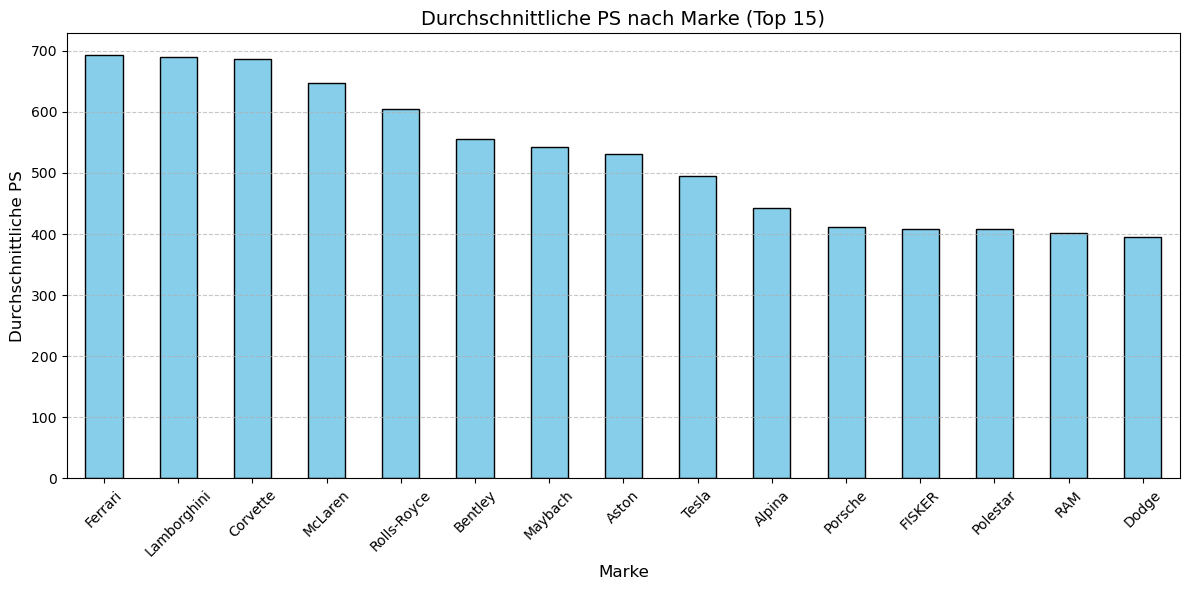

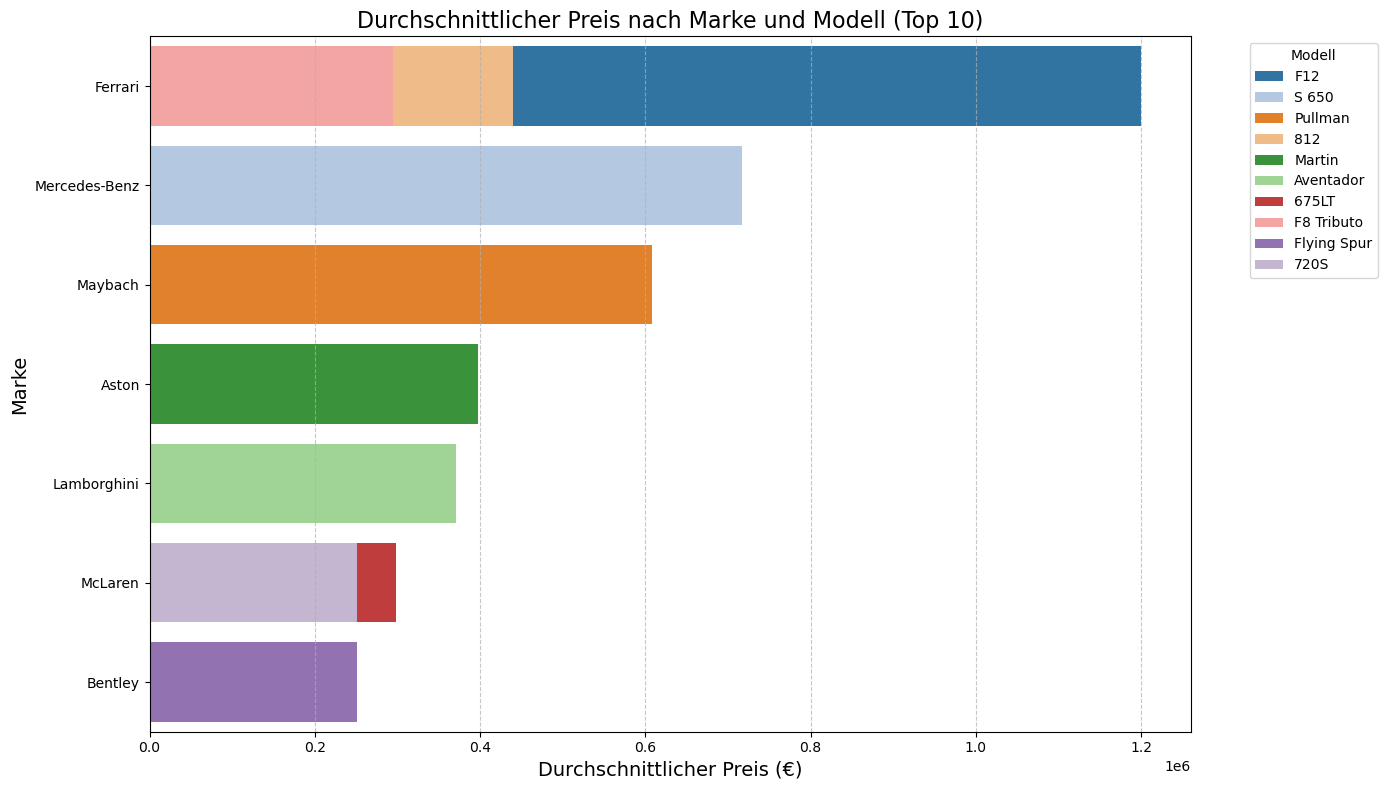

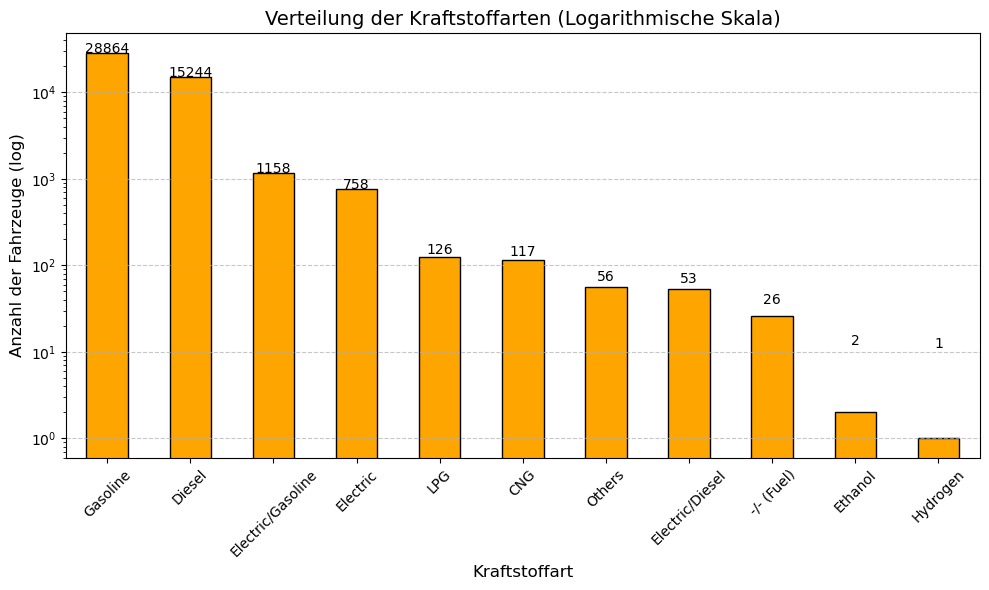

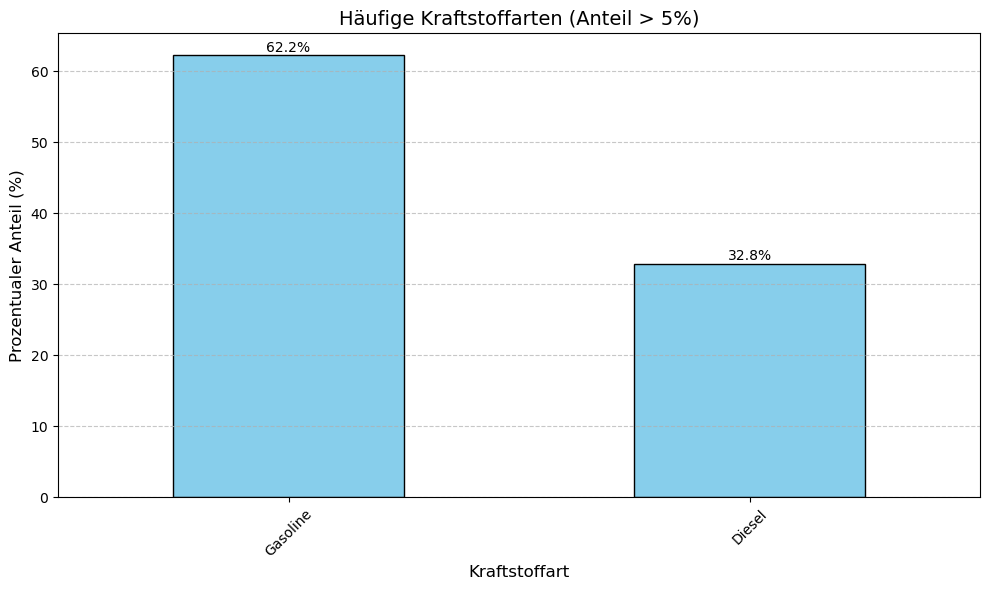

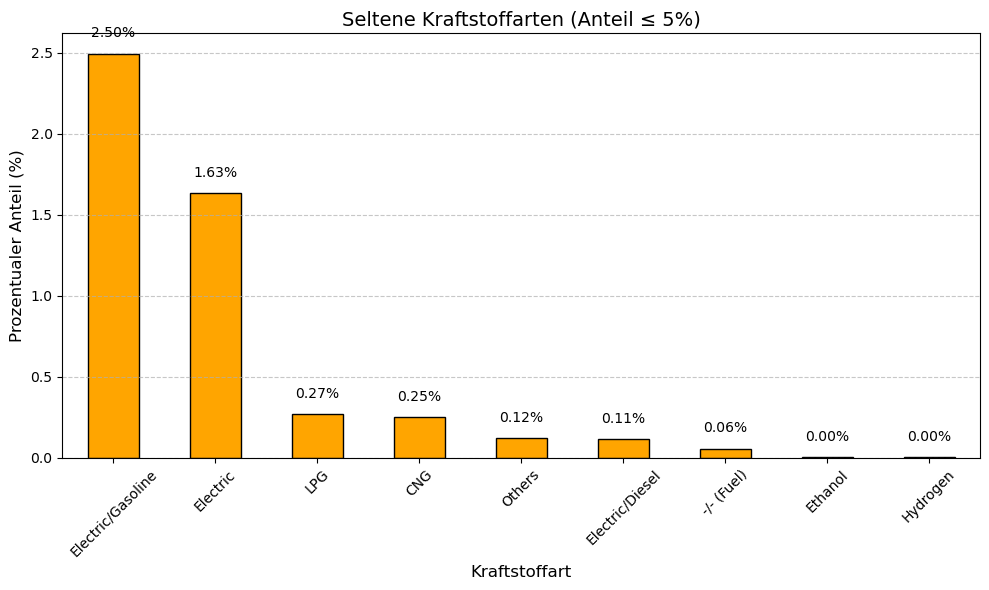

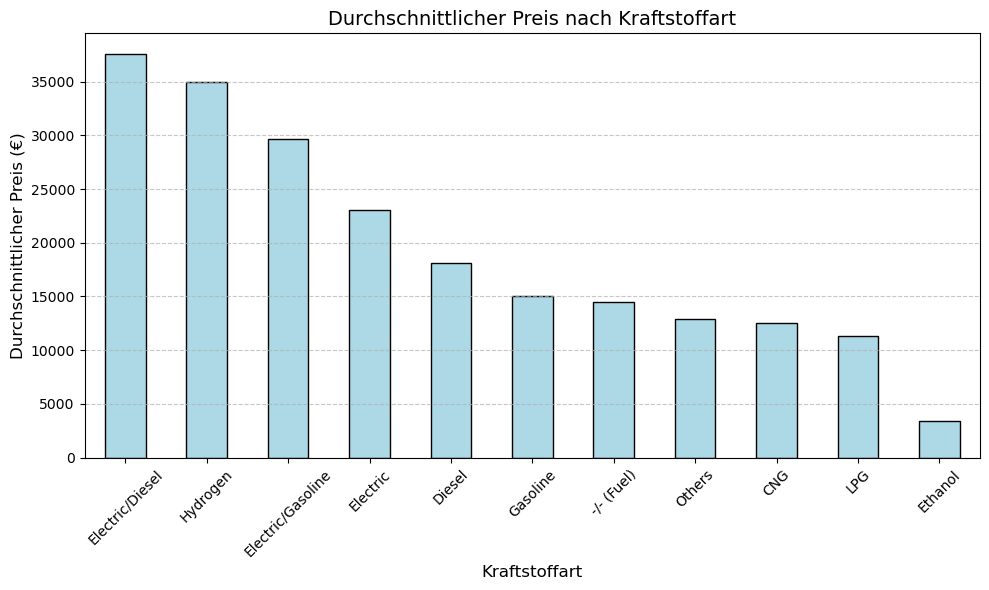

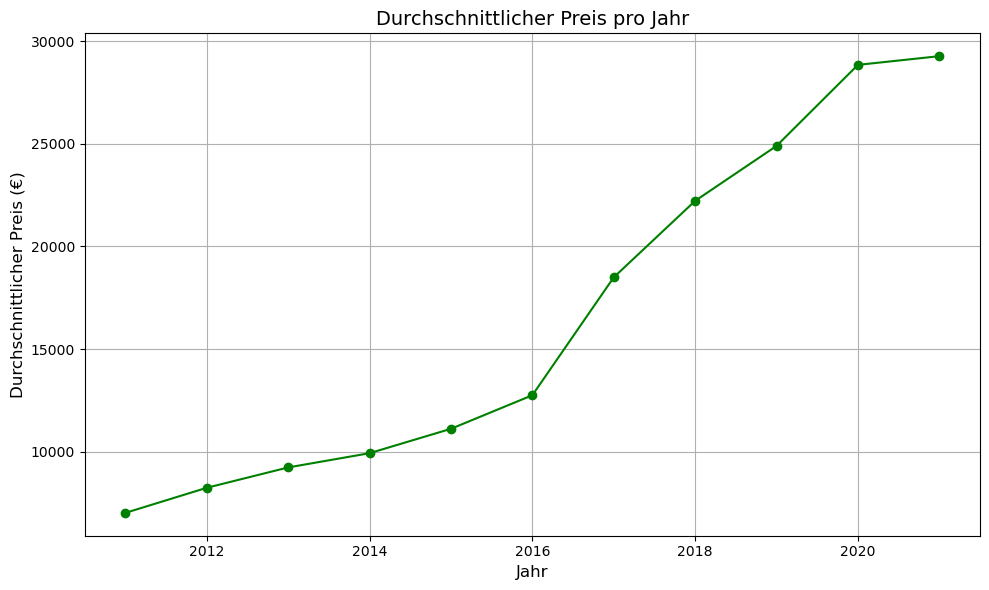

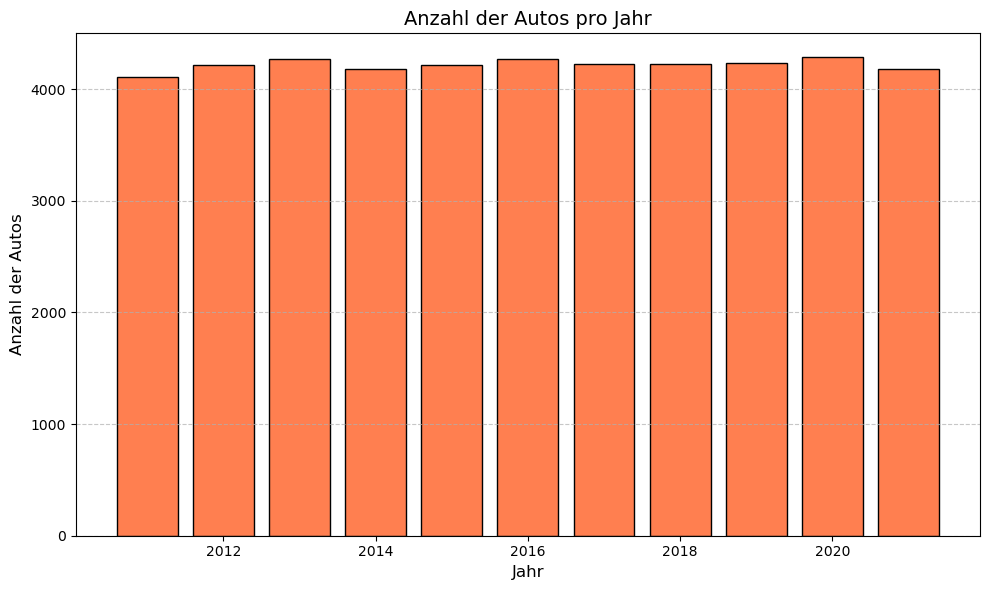

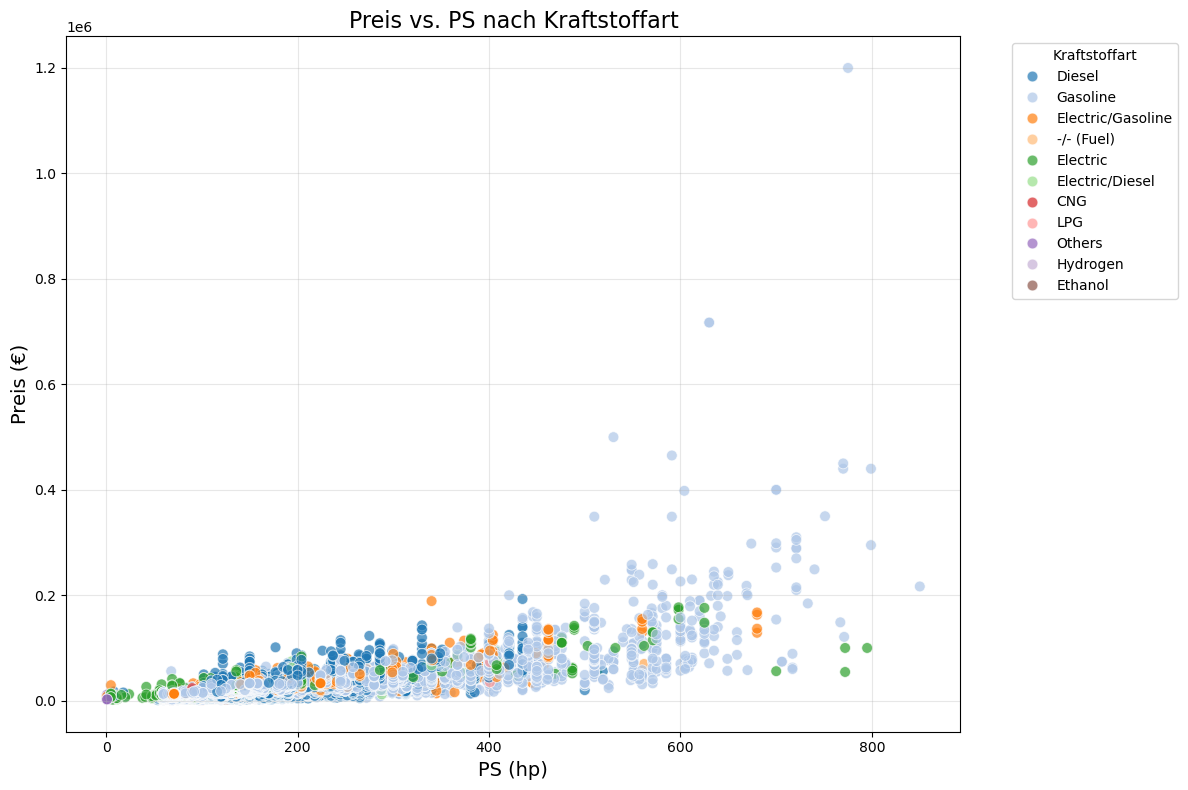

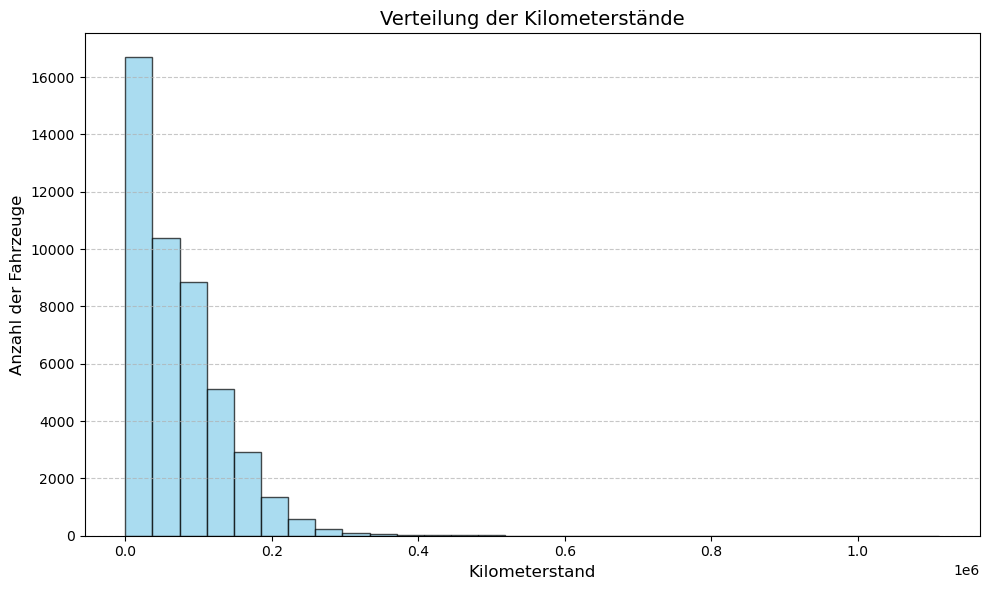

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datei einlesen
file_path = r"D:\DS\3_Projekte\Case Study\autoscout24.csv"
autos_data = pd.read_csv(file_path)

# Überblick über die Daten
print(f"Anzahl der verkauften Autos: {len(autos_data)}")
print(f"Zeitraum: {autos_data['year'].min()} bis {autos_data['year'].max()}")
print(f"Anzahl der Marken: {autos_data['make'].nunique()}")
print("Marken:", autos_data['make'].unique())

### Verbesserte Fragestellungen und Analysen

# 1. Verteilung der PS (Pferdestärken) nach Marke
plt.figure(figsize=(12, 6))
ps_verteilung = autos_data.groupby('make')['hp'].mean().sort_values(ascending=False)
ps_verteilung[:15].plot(kind='bar', color='skyblue', edgecolor='black')  # Top 15 Marken
plt.title("Durchschnittliche PS nach Marke (Top 15)", fontsize=14)
plt.xlabel("Marke", fontsize=12)
plt.ylabel("Durchschnittliche PS", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# 2. Top 10 teuerste Modelle
price_by_make_model_top10 = price_by_make_model.sort_values(by='price', ascending=False).head(10)

# Visualisierung der Top 10 mit optimierter Farbgebung
plt.figure(figsize=(14, 8))

sns.barplot(
    data=price_by_make_model_top10,
    x='price',
    y='make',
    hue='model',
    dodge=False,
    palette="tab20"  # Noch größere Farbpalette für bessere Differenzierung
)

# Titel und Achsenbeschriftungen
plt.title("Durchschnittlicher Preis nach Marke und Modell (Top 10)", fontsize=16)
plt.xlabel("Durchschnittlicher Preis (€)", fontsize=14)
plt.ylabel("Marke", fontsize=14)

# Legende verbessern
plt.legend(title="Modell", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Zusätzliche Anpassungen
plt.tight_layout()
plt.show()



# 3. Verteilung der Kraftstoffarten
# Verteilung der Kraftstoffarten berechnen
fuel_verteilung = autos_data['fuel'].value_counts()

# 1. Verteilung der Kraftstoffarten mit logarithmischer Skalierung
plt.figure(figsize=(10, 6))
fuel_verteilung.plot(kind='bar', color='orange', edgecolor='black')

# Titel und Achsenbeschriftungen
plt.title("Verteilung der Kraftstoffarten (Logarithmische Skala)", fontsize=14)
plt.xlabel("Kraftstoffart", fontsize=12)
plt.ylabel("Anzahl der Fahrzeuge (log)", fontsize=12)

# Logarithmische Skalierung der y-Achse
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Direkte Werte über den Balken anzeigen
for index, value in enumerate(fuel_verteilung):
    plt.text(index, value + 10, str(value), ha='center', fontsize=10)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

# 2. Prozentuale Anteile berechnen
fuel_percent = (fuel_verteilung / fuel_verteilung.sum()) * 100

# Häufige Kraftstoffarten (über 5% Anteil)
common_fuels = fuel_percent[fuel_percent > 5]

# Seltene Kraftstoffarten (5% oder weniger Anteil)
rare_fuels = fuel_percent[fuel_percent <= 5]

# 3. Balkendiagramm für häufige Kraftstoffarten
plt.figure(figsize=(10, 6))
common_fuels.plot(kind='bar', color='skyblue', edgecolor='black')

# Titel und Achsenbeschriftungen
plt.title("Häufige Kraftstoffarten (Anteil > 5%)", fontsize=14)
plt.xlabel("Kraftstoffart", fontsize=12)
plt.ylabel("Prozentualer Anteil (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Direkte Werte über den Balken anzeigen
for index, value in enumerate(common_fuels):
    plt.text(index, value + 0.5, f"{value:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Balkendiagramm für seltene Kraftstoffarten
plt.figure(figsize=(10, 6))
rare_fuels.plot(kind='bar', color='orange', edgecolor='black')

# Titel und Achsenbeschriftungen
plt.title("Seltene Kraftstoffarten (Anteil ≤ 5%)", fontsize=14)
plt.xlabel("Kraftstoffart", fontsize=12)
plt.ylabel("Prozentualer Anteil (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Direkte Werte über den Balken anzeigen
for index, value in enumerate(rare_fuels):
    plt.text(index, value + 0.1, f"{value:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()



# 4. Einfluss der Kraftstoffarten auf den Preis
fuel_price_influence = autos_data.groupby('fuel')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
fuel_price_influence.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Durchschnittlicher Preis nach Kraftstoffart", fontsize=14)
plt.xlabel("Kraftstoffart", fontsize=12)
plt.ylabel("Durchschnittlicher Preis (€)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Veränderungen über die Jahre (Preis, Anzahl der Autos)
autos_by_year = autos_data.groupby('year').agg({'price': 'mean', 'mileage': 'mean', 'year': 'count'}).rename(columns={'year': 'count'})
autos_by_year.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(autos_by_year['year'], autos_by_year['price'], marker='o', color='green')
plt.title("Durchschnittlicher Preis pro Jahr", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Durchschnittlicher Preis (€)", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(autos_by_year['year'], autos_by_year['count'], color='coral', edgecolor='black')
plt.title("Anzahl der Autos pro Jahr", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anzahl der Autos", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Scatterplot: Preis vs. PS (Wie beeinflussen PS den Preis?)
plt.figure(figsize=(12, 8))

# Scatterplot mit optimierter Farbpalette und Transparenz
sns.scatterplot(
    data=autos_data,
    x='hp',
    y='price',
    hue='fuel',
    palette='tab20',
    alpha=0.7,
    s=60  # Punktgröße
)

# Titel und Achsenbeschriftungen
plt.title("Preis vs. PS nach Kraftstoffart", fontsize=16)
plt.xlabel("PS (hp)", fontsize=14)
plt.ylabel("Preis (€)", fontsize=14)

# Legende außerhalb des Plots positionieren
plt.legend(title="Kraftstoffart", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Optional: Logarithmische Skala für die y-Achse
# plt.yscale('log')

# Gitterlinien hinzufügen
plt.grid(alpha=0.3)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


# 7. Histogramm: Verteilung der Kilometerstände
plt.figure(figsize=(10, 6))
autos_data['mileage'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Verteilung der Kilometerstände", fontsize=14)
plt.xlabel("Kilometerstand", fontsize=12)
plt.ylabel("Anzahl der Fahrzeuge", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
